# Portfolio Optimization

## 1. Load the Data

In [390]:
# Load Packages
import numpy as np
import pandas as pd
import yfinance
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

In [391]:
df_lcRaw = pd.read_csv('Large_Cap_AdjClose.csv')
df_mcRaw = pd.read_csv('Mid_Cap_AdjClose.csv')
df_scRaw = pd.read_csv('Small_Cap_AdjClose.csv')

In [392]:
df_lcRaw['Date'] = pd.to_datetime(df_lcRaw['Date'])
df_mcRaw['Date'] = pd.to_datetime(df_mcRaw['Date'])
df_scRaw['Date'] = pd.to_datetime(df_scRaw['Date'])

In [393]:
df_lcRaw = df_lcRaw.set_index('Date')
df_mcRaw = df_mcRaw.set_index('Date')
df_scRaw = df_scRaw.set_index('Date')

In [394]:
df_lcRaw.index = pd.to_datetime(df_lcRaw.index, utc=True)
df_mcRaw.index = pd.to_datetime(df_mcRaw.index, utc=True)
df_scRaw.index = pd.to_datetime(df_scRaw.index, utc=True)

## 2. Covariance and Correlation matrix
Obtain a covariance and correlation matrix to understand how different assets behave with respect to each other.

### 2.1 Covariance Matrix

In [395]:
# Log of percentage change
# large-cap tickers
cov_matrix_lc = df_lcRaw.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix_lc

,A,AAL,AAPL,ABC,ABT,ACM,ADBE,ADI,ADP,ADSK,...,WST,WTRG,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA
A,0.000271,0.000164,0.000142,0.000093,0.000135,0.000160,0.000175,0.000169,0.000125,0.000207,...,0.000144,0.000090,0.000152,0.000174,0.000061,0.000098,0.000151,0.000105,0.000125,0.000184
AAL,0.000164,0.001009,0.000161,0.000119,0.000109,0.000240,0.000155,0.000206,0.000164,0.000238,...,0.000078,0.000082,0.000257,0.000392,0.000043,0.000169,0.000206,0.000161,0.000193,0.000213
AAPL,0.000142,0.000161,0.000336,0.000083,0.000115,0.000132,0.000192,0.000182,0.000126,0.000201,...,0.000121,0.000082,0.000152,0.000183,0.000064,0.000093,0.000129,0.000102,0.000112,0.000189
ABC,0.000093,0.000119,0.000083,0.000255,0.000094,0.000120,0.000082,0.000099,0.000101,0.000103,...,0.000080,0.000078,0.000119,0.000102,0.000059,0.000086,0.000095,0.000072,0.000092,0.000100
ABT,0.000135,0.000109,0.000115,0.000094,0.000204,0.000105,0.000135,0.000123,0.000111,0.000144,...,0.000125,0.000089,0.000123,0.000107,0.000072,0.000070,0.000112,0.000085,0.000111,0.000134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XOM,0.000098,0.000169,0.000093,0.000086,0.000070,0.000163,0.000083,0.000126,0.000109,0.000116,...,0.000057,0.000080,0.000160,0.000204,0.000057,0.000267,0.000127,0.000091,0.000115,0.000121
XYL,0.000151,0.000206,0.000129,0.000095,0.000112,0.000192,0.000147,0.000166,0.000137,0.000181,...,0.000109,0.000103,0.000178,0.000200,0.000074,0.000127,0.000288,0.000116,0.000124,0.000172
YUM,0.000105,0.000161,0.000102,0.000072,0.000085,0.000131,0.000116,0.000117,0.000105,0.000134,...,0.000081,0.000086,0.000139,0.000161,0.000064,0.000091,0.000116,0.000241,0.000107,0.000121
ZBH,0.000125,0.000193,0.000112,0.000092,0.000111,0.000156,0.000118,0.000132,0.000109,0.000160,...,0.000097,0.000082,0.000153,0.000200,0.000056,0.000115,0.000124,0.000107,0.000270,0.000135


In [396]:
# mid-cap tickers
cov_matrix_mc = df_mcRaw.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix_mc

,AAON,AAP,AAWW,AB,ABCB,ABG,ABM,ABR,ACAD,ACHC,...,WU,WWD,WWE,X,XPO,XRAY,XRX,ZD,ZG,ZION
AAON,0.000438,0.000108,0.000186,0.000147,0.000190,0.000194,0.000167,0.000110,0.000188,0.000174,...,0.000115,0.000185,0.000129,0.000219,0.000191,0.000121,0.000165,0.000148,0.000170,0.000167
AAP,0.000108,0.000418,0.000106,0.000136,0.000152,0.000207,0.000131,0.000121,0.000143,0.000152,...,0.000101,0.000154,0.000106,0.000170,0.000198,0.000107,0.000153,0.000106,0.000153,0.000148
AAWW,0.000186,0.000106,0.000730,0.000174,0.000207,0.000218,0.000157,0.000107,0.000153,0.000177,...,0.000125,0.000184,0.000128,0.000329,0.000295,0.000103,0.000191,0.000141,0.000202,0.000182
AB,0.000147,0.000136,0.000174,0.000447,0.000217,0.000220,0.000159,0.000194,0.000162,0.000212,...,0.000119,0.000212,0.000120,0.000255,0.000235,0.000139,0.000235,0.000142,0.000219,0.000188
ABCB,0.000190,0.000152,0.000207,0.000217,0.000458,0.000268,0.000207,0.000200,0.000178,0.000230,...,0.000144,0.000257,0.000143,0.000302,0.000254,0.000160,0.000250,0.000162,0.000193,0.000314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XRAY,0.000121,0.000107,0.000103,0.000139,0.000160,0.000171,0.000123,0.000136,0.000144,0.000183,...,0.000103,0.000167,0.000085,0.000200,0.000165,0.000301,0.000167,0.000122,0.000164,0.000158
XRX,0.000165,0.000153,0.000191,0.000235,0.000250,0.000268,0.000184,0.000200,0.000206,0.000224,...,0.000160,0.000261,0.000134,0.000314,0.000274,0.000167,0.000528,0.000170,0.000239,0.000236
ZD,0.000148,0.000106,0.000141,0.000142,0.000162,0.000175,0.000142,0.000119,0.000195,0.000155,...,0.000109,0.000164,0.000128,0.000181,0.000213,0.000122,0.000170,0.000372,0.000233,0.000143
ZG,0.000170,0.000153,0.000202,0.000219,0.000193,0.000265,0.000140,0.000226,0.000291,0.000223,...,0.000126,0.000222,0.000167,0.000253,0.000312,0.000164,0.000239,0.000233,0.001178,0.000159


In [397]:
# small-cap tickers
cov_matrix_sc = df_scRaw.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix_sc

,AAIC,AAME,AAT,ABEO,ABIO,ABVC,ACCO,ACER,ACGN,ACHV,...,XOMA,XWEL,YELL,YORW,ZEST,ZEUS,ZIONP,ZIVO,ZTR,ZYXI
AAIC,0.000719,0.000021,0.000210,0.000231,0.000065,0.000054,0.000250,0.000301,2.191802e-04,0.000156,...,0.000205,0.000261,0.000314,0.000141,0.000009,0.000225,0.000151,0.000035,0.000214,0.000122
AAME,0.000021,0.001563,0.000008,0.000144,0.000067,-0.000028,0.000035,0.000014,8.817572e-05,0.000137,...,0.000035,0.000001,0.000023,0.000017,0.000043,0.000044,-0.000010,0.000017,0.000033,0.000007
AAT,0.000210,0.000008,0.000317,0.000100,0.000015,-0.000039,0.000185,0.000098,9.607777e-05,0.000124,...,0.000144,0.000120,0.000226,0.000136,0.000006,0.000174,0.000052,0.000099,0.000108,0.000096
ABEO,0.000231,0.000144,0.000100,0.004161,0.000206,0.000545,0.000160,0.000280,4.754333e-04,0.000329,...,0.000324,0.000409,0.000394,0.000088,0.000162,0.000283,0.000096,0.000095,0.000126,0.000107
ABIO,0.000065,0.000067,0.000015,0.000206,0.004275,0.000014,0.000032,0.000102,2.809331e-04,0.000196,...,0.000311,0.000193,0.000127,0.000047,0.000255,0.000118,0.000023,-0.000010,0.000059,0.000085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEUS,0.000225,0.000044,0.000174,0.000283,0.000118,0.000200,0.000314,0.000174,2.705770e-04,0.000183,...,0.000282,0.000221,0.000435,0.000144,0.000019,0.001202,0.000042,0.000084,0.000097,0.000044
ZIONP,0.000151,-0.000010,0.000052,0.000096,0.000023,-0.000070,0.000063,0.000093,6.210581e-05,0.000043,...,0.000049,0.000098,0.000085,0.000038,-0.000015,0.000042,0.000244,0.000008,0.000072,0.000037
ZIVO,0.000035,0.000017,0.000099,0.000095,-0.000010,0.000116,0.000061,0.000124,-2.300182e-05,0.000238,...,-0.000003,0.000135,0.000068,0.000066,0.000532,0.000084,0.000008,0.010987,0.000034,0.000151
ZTR,0.000214,0.000033,0.000108,0.000126,0.000059,-0.000024,0.000114,0.000155,1.193398e-04,0.000073,...,0.000103,0.000142,0.000145,0.000076,0.000053,0.000097,0.000072,0.000034,0.000173,0.000068


### 2.2 Correlation Matrix
-1 -> negative relation  
+1 -> positive relation  
0 -> no relation

In [398]:
# large-cap tickers
corr_matrix_lc = df_lcRaw.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix_lc

,A,AAL,AAPL,ABC,ABT,ACM,ADBE,ADI,ADP,ADSK,...,WST,WTRG,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA
A,1.000000,0.312715,0.471582,0.353966,0.573581,0.470486,0.543747,0.559397,0.531585,0.547957,...,0.511550,0.376187,0.475694,0.354096,0.296282,0.363157,0.540338,0.409729,0.463051,0.480587
AAL,0.312715,1.000000,0.276448,0.234268,0.239607,0.366716,0.249293,0.352781,0.361413,0.327370,...,0.143918,0.178464,0.415349,0.412804,0.108272,0.325184,0.382001,0.327373,0.369746,0.287951
AAPL,0.471582,0.276448,1.000000,0.283209,0.437597,0.350146,0.535529,0.540221,0.480257,0.479658,...,0.384065,0.308300,0.426913,0.333710,0.280291,0.310997,0.413960,0.359539,0.371001,0.445167
ABC,0.353966,0.234268,0.283209,1.000000,0.412640,0.363001,0.262935,0.336991,0.441525,0.282151,...,0.291047,0.336632,0.382233,0.213645,0.295356,0.329976,0.348931,0.289487,0.349412,0.270753
ABT,0.573581,0.239607,0.437597,0.412640,1.000000,0.356999,0.485219,0.466184,0.541725,0.439742,...,0.509060,0.432007,0.444008,0.250794,0.403799,0.301350,0.459916,0.384442,0.471218,0.404391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XOM,0.363157,0.325184,0.310997,0.329976,0.301350,0.482728,0.260495,0.417367,0.466857,0.308766,...,0.202994,0.336689,0.501772,0.416933,0.278171,1.000000,0.455886,0.357966,0.426839,0.318605
XYL,0.540338,0.382001,0.413960,0.348931,0.459916,0.549039,0.443872,0.531544,0.562477,0.466199,...,0.374959,0.418153,0.538234,0.394790,0.349561,0.455886,1.000000,0.439777,0.443405,0.435323
YUM,0.409729,0.327373,0.359539,0.289487,0.384442,0.408492,0.382404,0.409134,0.473033,0.377527,...,0.303852,0.382551,0.460104,0.347197,0.330366,0.357966,0.439777,1.000000,0.419490,0.335402
ZBH,0.463051,0.369746,0.371001,0.349412,0.471218,0.460118,0.369050,0.436395,0.462448,0.425724,...,0.344090,0.345716,0.478768,0.408527,0.273488,0.426839,0.443405,0.419490,1.000000,0.353102


In [399]:
# mid-cap tickers
corr_matrix_mc = df_mcRaw.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix_mc

,AAON,AAP,AAWW,AB,ABCB,ABG,ABM,ABR,ACAD,ACHC,...,WU,WWD,WWE,X,XPO,XRAY,XRX,ZD,ZG,ZION
AAON,1.000000,0.251859,0.329421,0.331365,0.423137,0.366116,0.416555,0.235473,0.196303,0.307086,...,0.314753,0.423275,0.228922,0.283013,0.303727,0.332958,0.342627,0.366793,0.237225,0.388668
AAP,0.251859,1.000000,0.191719,0.314240,0.348176,0.400013,0.334574,0.263882,0.153244,0.273765,...,0.283590,0.362107,0.192551,0.225101,0.322794,0.302090,0.324886,0.268505,0.218285,0.351655
AAWW,0.329421,0.191719,1.000000,0.303632,0.357254,0.319892,0.304327,0.176434,0.123866,0.240929,...,0.264904,0.326280,0.176554,0.329661,0.363304,0.219404,0.308052,0.271088,0.217626,0.328582
AB,0.331365,0.314240,0.303632,1.000000,0.479037,0.412240,0.392584,0.409219,0.167730,0.369804,...,0.322989,0.481727,0.212072,0.327084,0.370058,0.377795,0.482487,0.347504,0.301684,0.431820
ABCB,0.423137,0.348176,0.357254,0.479037,1.000000,0.496742,0.505503,0.416538,0.181604,0.396095,...,0.385364,0.577080,0.249128,0.382172,0.395484,0.430318,0.507686,0.392424,0.262610,0.713456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XRAY,0.332958,0.302090,0.219404,0.377795,0.430318,0.389167,0.369204,0.351039,0.181464,0.389150,...,0.341487,0.463026,0.183304,0.311740,0.316934,1.000000,0.419181,0.363715,0.274918,0.443651
XRX,0.342627,0.324886,0.308052,0.482487,0.507686,0.460837,0.418656,0.387739,0.195640,0.358785,...,0.398210,0.545264,0.217364,0.370478,0.396539,0.419181,1.000000,0.382862,0.302406,0.499518
ZD,0.366793,0.268505,0.271088,0.347504,0.392424,0.359262,0.385106,0.276254,0.220488,0.296236,...,0.323219,0.408516,0.247597,0.253538,0.367836,0.363715,0.382862,1.000000,0.351115,0.361352
ZG,0.237225,0.218285,0.217626,0.301684,0.262610,0.305254,0.212853,0.294060,0.185583,0.239821,...,0.209789,0.310296,0.181369,0.199684,0.303093,0.274918,0.302406,0.351115,1.000000,0.225361


In [400]:
# small-cap tickers
corr_matrix_sc = df_scRaw.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix_sc

,AAIC,AAME,AAT,ABEO,ABIO,ABVC,ACCO,ACER,ACGN,ACHV,...,XOMA,XWEL,YELL,YORW,ZEST,ZEUS,ZIONP,ZIVO,ZTR,ZYXI
AAIC,1.000000,0.020204,0.438898,0.133541,0.037357,0.007053,0.360654,0.148609,0.134494,0.104874,...,0.140171,0.131093,0.215628,0.288295,0.002514,0.241703,0.359289,0.012353,0.606707,0.069725
AAME,0.020204,1.000000,0.010777,0.056538,0.025885,-0.002507,0.034142,0.004674,0.036696,0.062406,...,0.016421,0.000456,0.010814,0.023731,0.008664,0.031956,-0.016449,0.004139,0.064145,0.002561
AAT,0.438898,0.010777,1.000000,0.086638,0.012868,-0.007779,0.401052,0.072882,0.088768,0.125537,...,0.148674,0.090939,0.233669,0.418884,0.002761,0.281939,0.188423,0.053024,0.459092,0.082445
ABEO,0.133541,0.056538,0.086638,1.000000,0.048749,0.029669,0.095837,0.057467,0.121261,0.092057,...,0.092367,0.085317,0.112360,0.075233,0.019733,0.126334,0.094790,0.014009,0.148477,0.025372
ABIO,0.037357,0.025885,0.012868,0.048749,1.000000,0.000768,0.019149,0.020733,0.070695,0.054192,...,0.087414,0.039672,0.035596,0.039738,0.030727,0.052185,0.022845,-0.001518,0.068224,0.019858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEUS,0.241703,0.031956,0.281939,0.126334,0.052185,0.020234,0.350615,0.066520,0.128398,0.095222,...,0.149579,0.085842,0.230621,0.227498,0.004368,1.000000,0.077026,0.023133,0.212921,0.019485
ZIONP,0.359289,-0.016449,0.188423,0.094790,0.022845,-0.015825,0.156022,0.078607,0.065382,0.049788,...,0.057142,0.084448,0.099460,0.132271,-0.007333,0.077026,1.000000,0.004601,0.348872,0.036406
ZIVO,0.012353,0.004139,0.053024,0.014009,-0.001518,0.003883,0.022657,0.015676,-0.003611,0.040962,...,-0.000542,0.017272,0.011925,0.034604,0.039991,0.023133,0.004601,1.000000,0.024495,0.022058
ZTR,0.606707,0.064145,0.459092,0.148477,0.068224,-0.006326,0.335741,0.155506,0.149243,0.099768,...,0.143424,0.145188,0.203385,0.319029,0.031751,0.212921,0.348872,0.024495,1.000000,0.078461


## 3. Portfolio expected returns
The mean of returns (given by change in prices of asset stock prices) give us the expected returns of that asset.

The sum of all individual expected returns further multiplied by the weight of assets give us expected return for the portfolio.

### 3.1 Yearly returns and volatility for individual companies

In [401]:
# Yearly returns for individual companies
# large-cap tickers
ind_er_lc = df_lcRaw.resample('Y').last().pct_change().mean()
ind_er_lc

A       0.179737
AAL     0.111181
AAPL    0.267607
ABC     0.165697
ABT     0.152471
          ...   
XOM     0.107884
XYL     0.155350
YUM     0.119290
ZBH     0.086077
ZBRA    0.267435
Length: 451, dtype: float64

In [402]:
# mid-cap tickers
ind_er_mc = df_mcRaw.resample('Y').last().pct_change().mean()
ind_er_mc

AAON    0.270865
AAP     0.120804
AAWW    0.136276
AB      0.091254
ABCB    0.162106
          ...   
XRAY    0.036116
XRX     0.063823
ZD      0.131601
ZG      0.366359
ZION    0.112846
Length: 513, dtype: float64

In [403]:
# small-cap tickers
ind_er_sc = df_scRaw.resample('Y').last().pct_change().mean()
ind_er_sc

AAIC    -0.131113
AAME    -0.001562
AAT      0.013296
ABEO    -0.116903
ABIO    -0.312463
           ...   
ZEUS     0.179278
ZIONP    0.004147
ZIVO     1.776121
ZTR     -0.037875
ZYXI     1.128883
Length: 1407, dtype: float64

In [404]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
# large-cap tickers
ann_sd_lc = df_lcRaw.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd_lc

A       0.260292
AAL     0.502364
AAPL    0.289740
ABC     0.252550
ABT     0.225966
          ...   
XOM     0.258499
XYL     0.268443
YUM     0.245223
ZBH     0.259646
ZBRA    0.367281
Length: 451, dtype: float64

In [405]:
# mid-cap tickers
ann_sd_mc = df_mcRaw.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd_mc

AAON    0.331056
AAP     0.323452
AAWW    0.427235
AB      0.334439
ABCB    0.338255
          ...   
XRAY    0.274269
XRX     0.363449
ZD      0.305161
ZG      0.542629
ZION    0.324934
Length: 513, dtype: float64

In [406]:
# small-cap tickers
ann_sd_sc = df_scRaw.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd_sc

AAIC     0.423958
AAME     0.625114
AAT      0.281573
ABEO     1.019986
ABIO     1.033816
           ...   
ZEUS     0.548227
ZIONP    0.247116
ZIVO     1.657334
ZTR      0.208026
ZYXI     1.034693
Length: 1407, dtype: float64

In [407]:
# large-cap tickers
assets_lc = pd.concat([ind_er_lc, ann_sd_lc], axis=1) # Creating a table for visualising returns and volatility of assets
assets_lc.columns = ['Returns', 'Volatility']
assets_lc

,Returns,Volatility
A,0.179737,0.260292
AAL,0.111181,0.502364
AAPL,0.267607,0.289740
ABC,0.165697,0.252550
ABT,0.152471,0.225966
...,...,...
XOM,0.107884,0.258499
XYL,0.155350,0.268443
YUM,0.119290,0.245223
ZBH,0.086077,0.259646


In [408]:
# mid-cap tickers
assets_mc = pd.concat([ind_er_mc, ann_sd_mc], axis=1) # Creating a table for visualising returns and volatility of assets
assets_mc.columns = ['Returns', 'Volatility']
assets_mc

,Returns,Volatility
AAON,0.270865,0.331056
AAP,0.120804,0.323452
AAWW,0.136276,0.427235
AB,0.091254,0.334439
ABCB,0.162106,0.338255
...,...,...
XRAY,0.036116,0.274269
XRX,0.063823,0.363449
ZD,0.131601,0.305161
ZG,0.366359,0.542629


In [409]:
# small-cap tickers
assets_sc = pd.concat([ind_er_sc, ann_sd_sc], axis=1) # Creating a table for visualising returns and volatility of assets
assets_sc.columns = ['Returns', 'Volatility']
assets_sc

,Returns,Volatility
AAIC,-0.131113,0.423958
AAME,-0.001562,0.625114
AAT,0.013296,0.281573
ABEO,-0.116903,1.019986
ABIO,-0.312463,1.033816
...,...,...
ZEUS,0.179278,0.548227
ZIONP,0.004147,0.247116
ZIVO,1.776121,1.657334
ZTR,-0.037875,0.208026


### 3.2 Get Portfolios

In [413]:
def get_portfolio(df, ind_er, cov_matrix):
    p_ret = [] # Define an empty array for portfolio returns
    p_vol = [] # Define an empty array for portfolio volatility
    p_weights = [] # Define an empty array for asset weights

    num_assets = len(df.columns)
    num_portfolios = 10000
    
    for portfolio in range(num_portfolios):
        weights = np.random.random(num_assets)  
        weights = weights/np.sum(weights)
        p_weights.append(weights)
        returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
        p_ret.append(returns)
        var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
        sd = np.sqrt(var) # Daily standard deviation
        ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
        p_vol.append(ann_sd)
    
    data = {'Returns':p_ret, 'Volatility':p_vol}

    for counter, symbol in enumerate(df.columns.tolist()):
        #print(counter, symbol)
        data[symbol+' weight'] = [w[counter] for w in p_weights]
    
    portfolios  = pd.DataFrame(data)
    return portfolios
    

In [417]:
portfolios_lc = get_portfolio(df_lcRaw, ind_er_lc, cov_matrix_lc)
portfolios_lc.head()

,Returns,Volatility,A weight,AAL weight,AAPL weight,ABC weight,ABT weight,ACM weight,ADBE weight,ADI weight,...,WST weight,WTRG weight,WY weight,WYNN weight,XEL weight,XOM weight,XYL weight,YUM weight,ZBH weight,ZBRA weight
0,0.167288,0.178415,0.000886,0.001653,0.001999,0.004405,0.002294,0.002839,0.003516,0.000900,...,0.001498,0.000223,0.000270,0.000187,0.002655,0.003830,0.004606,0.001133,0.001579,0.000784
1,0.169574,0.179479,0.002397,0.003815,0.000821,0.004211,0.000647,0.002247,0.002403,0.001156,...,0.003158,0.001755,0.002565,0.001792,0.002991,0.000350,0.004031,0.001748,0.002123,0.000804
2,0.168668,0.176516,0.002863,0.003607,0.002380,0.003906,0.000485,0.003881,0.001384,0.002269,...,0.003801,0.002799,0.003235,0.000544,0.001997,0.003487,0.000695,0.003797,0.003148,0.001345
3,0.170042,0.179007,0.002403,0.001571,0.000932,0.000731,0.003589,0.003209,0.000819,0.004336,...,0.002843,0.002025,0.000456,0.004528,0.003806,0.004463,0.003552,0.002703,0.004402,0.004319
4,0.167874,0.177466,0.004199,0.003533,0.000106,0.000251,0.000188,0.000723,0.001455,0.000408,...,0.003586,0.000973,0.000704,0.000621,0.000607,0.000201,0.003355,0.000959,0.000792,0.003539


In [418]:
portfolios_mc = get_portfolio(df_mcRaw, ind_er_mc, cov_matrix_mc)
portfolios_mc.head()

,Returns,Volatility,AAON weight,AAP weight,AAWW weight,AB weight,ABCB weight,ABG weight,ABM weight,ABR weight,...,WU weight,WWD weight,WWE weight,X weight,XPO weight,XRAY weight,XRX weight,ZD weight,ZG weight,ZION weight
0,0.146341,0.213879,0.001947,0.003321,0.001390,0.003251,0.000003,0.001589,0.003277,0.000509,...,0.001372,0.003440,0.002722,0.001948,0.002250,0.000825,0.000356,0.002173,0.000980,0.003764
1,0.149929,0.212865,0.002097,0.001948,0.003324,0.002478,0.002159,0.002558,0.001616,0.000836,...,0.002404,0.002907,0.000919,0.003480,0.003309,0.001057,0.002509,0.001743,0.002276,0.001765
2,0.148842,0.212853,0.002169,0.001945,0.001131,0.000458,0.002264,0.002236,0.000045,0.000546,...,0.003799,0.002683,0.002034,0.001067,0.002273,0.001767,0.002608,0.003605,0.003634,0.003012
3,0.146157,0.212259,0.001328,0.001437,0.003208,0.002411,0.001700,0.003050,0.000464,0.000829,...,0.000946,0.003667,0.001746,0.003221,0.002034,0.001864,0.001948,0.002842,0.002034,0.003042
4,0.148248,0.211811,0.003061,0.003689,0.003679,0.003535,0.003008,0.000741,0.002813,0.003707,...,0.000208,0.001671,0.000877,0.000630,0.000172,0.002126,0.000691,0.001037,0.003512,0.000530


In [419]:
portfolios_sc = get_portfolio(df_scRaw, ind_er_sc, cov_matrix_sc)
portfolios_sc.head()

,Returns,Volatility,AAIC weight,AAME weight,AAT weight,ABEO weight,ABIO weight,ABVC weight,ACCO weight,ACER weight,...,XOMA weight,XWEL weight,YELL weight,YORW weight,ZEST weight,ZEUS weight,ZIONP weight,ZIVO weight,ZTR weight,ZYXI weight
0,0.105500,0.165063,0.001207,0.000844,0.000119,0.000389,0.001220,0.000979,0.000482,0.000808,...,0.000726,0.000590,0.000152,0.001229,0.001397,0.000591,0.000045,0.000977,0.000416,0.000359
1,0.105271,0.166202,0.000925,0.000178,0.001200,0.001381,0.000483,0.001186,0.000619,0.001369,...,0.000105,0.001153,0.000354,0.000726,0.001402,0.001383,0.000639,0.000313,0.000576,0.000534
2,0.098400,0.163542,0.001342,0.001018,0.000364,0.001293,0.001028,0.000580,0.000596,0.001392,...,0.001314,0.001206,0.000666,0.000334,0.000650,0.000450,0.000378,0.000988,0.000353,0.000013
3,0.104927,0.166676,0.000207,0.000861,0.001177,0.000381,0.000873,0.000109,0.000864,0.000156,...,0.000759,0.000035,0.000489,0.000004,0.000653,0.000842,0.000171,0.000447,0.001078,0.001230
4,0.105240,0.165655,0.000078,0.000404,0.000106,0.000216,0.000922,0.001342,0.000649,0.000877,...,0.001013,0.001246,0.000804,0.001267,0.000897,0.000831,0.001273,0.001369,0.000235,0.000541


### 3.3 Plot Efficient Frontier

Each point on the line (left edge) represents an optimal portfolio of stocks that maximises the returns for any given level of risk. The point (portfolios) in the interior are sub-optimal for a given risk level. For every interior point, there is another that offers higher returns for the same risk.

On this graph, you can also see the combination of weights that will give you all possible combinations:

- Minimum volatility (left most point)
- Maximum returns (top most point)
- And everything in between.


<AxesSubplot:title={'center':'Large-cap Tickers'}, xlabel='Volatility', ylabel='Returns'>

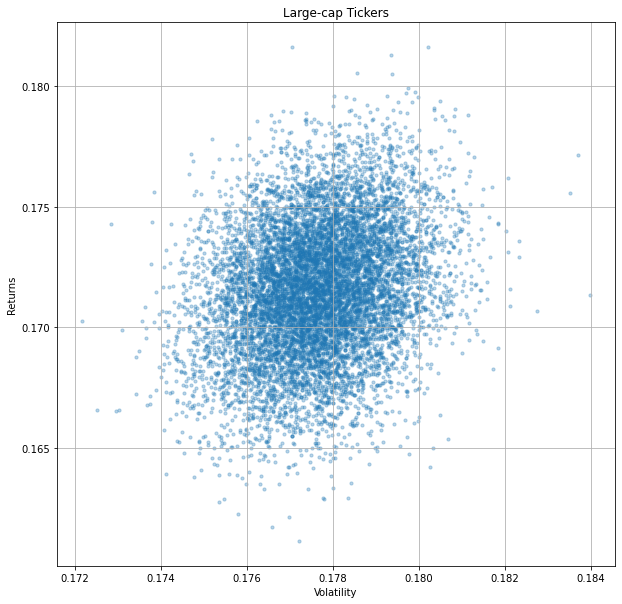

In [425]:
# Plot efficient frontier
portfolios_lc.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10], title = 'Large-cap Tickers')

<AxesSubplot:title={'center':'Mid-cap Tickers'}, xlabel='Volatility', ylabel='Returns'>

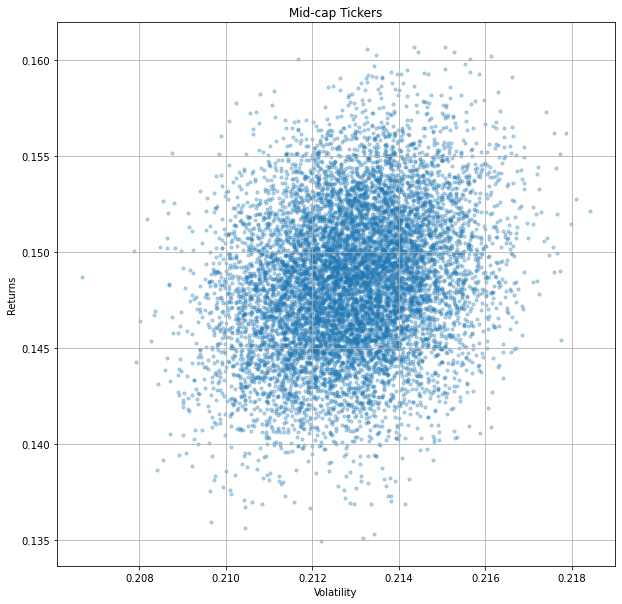

In [426]:
portfolios_mc.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10], title = 'Mid-cap Tickers')

<AxesSubplot:title={'center':'Small-cap Tickers'}, xlabel='Volatility', ylabel='Returns'>

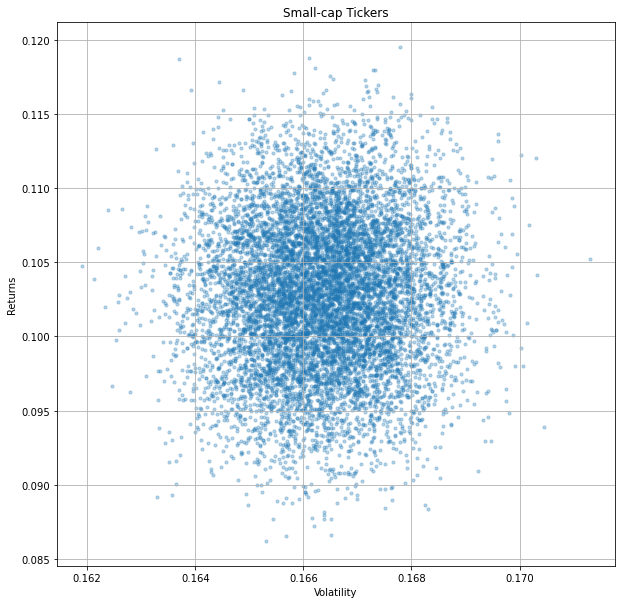

In [427]:
portfolios_sc.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10], title = 'Small-cap Tickers')

### 3.4 Plot Minimum Volatility Portfolio

In [432]:
min_vol_port_lc = portfolios_lc.iloc[portfolios_lc['Volatility'].idxmin()]
min_vol_port_mc = portfolios_mc.iloc[portfolios_mc['Volatility'].idxmin()]
min_vol_port_sc = portfolios_sc.iloc[portfolios_sc['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               

The minimum volatility is in a portfolio with weights shown above. The point can be plotted on the gragh as:

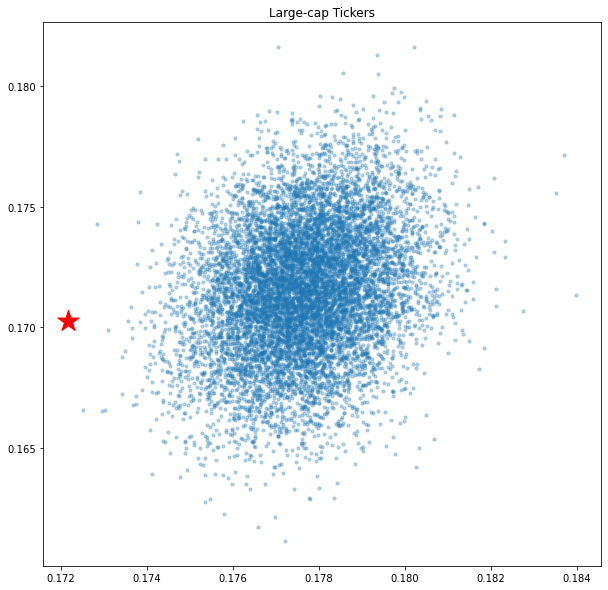

In [438]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.title('Large-cap Tickers')
plt.scatter(portfolios_lc['Volatility'], portfolios_lc['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port_lc[1], min_vol_port_lc[0], color='r', marker='*', s=500)

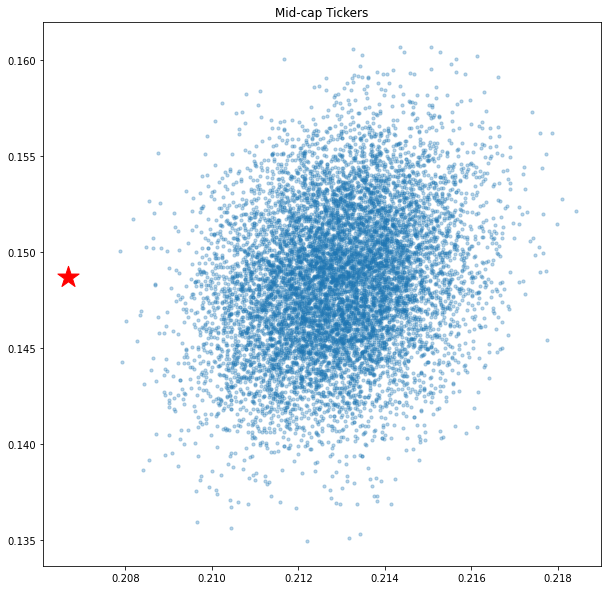

In [439]:
plt.subplots(figsize=[10,10])
plt.title('Mid-cap Tickers')
plt.scatter(portfolios_mc['Volatility'], portfolios_mc['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port_mc[1], min_vol_port_mc[0], color='r', marker='*', s=500)

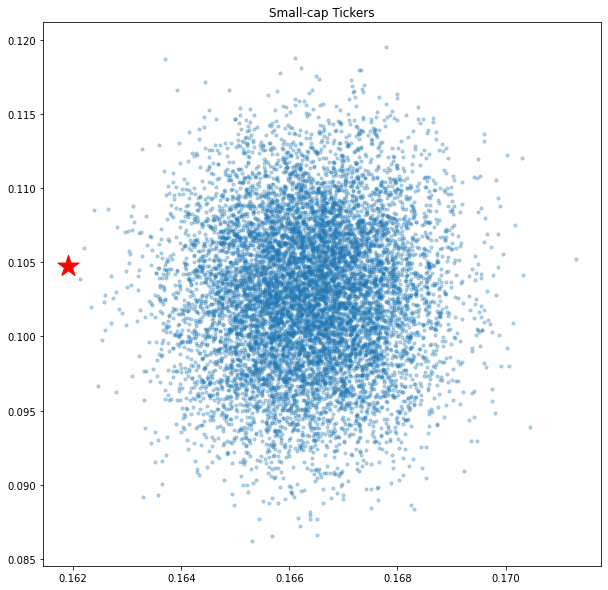

In [440]:
plt.subplots(figsize=[10,10])
plt.title('Small-cap Tickers')
plt.scatter(portfolios_sc['Volatility'], portfolios_sc['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port_sc[1], min_vol_port_sc[0], color='r', marker='*', s=500)

## 4. Personalized Optimal Portfolio

### 4.1 Construct the Recommendation Function

In [450]:
from scipy.optimize import minimize
import numpy as np

In [451]:
def recommendation(w,risk_avs, var, exp_return):
    w = np.asarray(w)
    diff = (risk_avs/2) * w @ var @ w - exp_return @ w
    return diff

In [452]:
def constraint1(w):
    return 1-sum(w)

### 4.2 Example of Optimizaing Porfolios
We opimize the porfolios based on the large-cap tickers, and provide a personalized risk recommendation, given the risk aversion of a client (set to 5 as default).

In [453]:
cov_lc = cov_matrix_lc.values.tolist()
ret_lc = ind_er_lc.values.tolist()

In [455]:
w0 = np.zeros(len(df_lcRaw.columns))
risk_avs = 5 # we make an assumption that the risk aversion is 5 to test the correctness of function
"""
Testing example:

var = [[0.000245,0.000084,0.000122,0.000142],
       [0.000084,0.000219,0.000085,0.000092],
       [0.000122,0.000085,0.000221,0.000176],
      [0.000142,0.000092,0.000176,0.000333]]
exp_return = [0.282997, 0.195950, 0.217545,0.472289]

"""
con1 = {'type': 'eq', 'fun': constraint1}
cons = [con1]

res_lc = minimize(recommendation, w0, method='SLSQP', args=(risk_avs, cov_lc, ret_lc),constraints = cons, options={'gtol': 1e-6, 'disp': True})

<ipython-input-455-579179e3e911>:16: OptimizeWarning: Unknown solver options: gtol
  res_lc = minimize(recommendation, w0, method='SLSQP', args=(risk_avs, cov_lc, ret_lc),constraints = cons, options={'gtol': 1e-6, 'disp': True})


Iteration limit reached    (Exit mode 9)
            Current function value: -772.2502056638848
            Iterations: 100
            Function evaluations: 45200
            Gradient evaluations: 100


In [460]:
res_lc.x/100

array([-4.02004605e-01, -4.95352015e-01, -3.33846973e-01,  8.31742832e-01,
       -8.28779027e-02, -2.60444914e-01, -8.70159040e-02, -8.98003236e-01,
        1.04394272e-01, -2.47699271e-01,  5.64661141e-02,  9.50067989e-01,
        1.59855796e-01,  2.47072767e+00, -1.25891308e-01, -1.02449341e+00,
       -1.08371954e+00,  7.33863055e-01, -6.52886123e-01, -2.00469819e-01,
        3.69422483e-01,  1.94912525e-01,  5.46650711e-01,  6.24384152e-01,
        1.52314808e-01, -1.25490157e+00, -5.29596400e-01,  2.24793040e+00,
        1.05266499e-01,  9.36778999e-02, -1.33188674e+00,  4.12011857e-01,
        2.48485288e-01, -5.04959141e-01, -2.08715716e-01, -1.03109760e-01,
       -1.07637558e+00,  1.65534894e+00,  4.64206615e-01, -1.21304419e+00,
        1.19936633e+00,  1.85833058e+00,  6.35566969e-01,  3.99205568e-02,
       -4.01966623e-01, -9.04318359e-02, -2.29927799e-01,  4.18026538e-01,
        4.46866458e-01, -1.67719045e-01, -1.04550956e+00,  9.08500303e-01,
        1.22893648e+00, -

### 4.2 Get Client Data

In [466]:
df_client = pd.read_csv('Risk_Aversion_Data.csv')
df_client

,clientID,RiskAversion
0,user-0000000000000001,5.021125
1,user-0000000000000002,6.658645
2,user-0000000000000003,3.347183
3,user-0000000000000008,3.180899
4,user-0000000000000010,5.075350
...,...,...
50395,user-0000000000000993,2.621720
50396,user-0000000000000994,6.021187
50397,user-0000000000000997,4.996553
50398,user-0000000000000998,2.111006


In [467]:
def condition(x):
    if x>=0 and x<3.33:
        return 'Aggressive'
    elif x>=3.33 and x<6.67:
        return 'Moderate'
    else:
        return 'Conservative'

df_client['RiskType'] = df_client['RiskAversion'].apply(condition)

In [469]:
df_client = df_client.drop(columns = 'clientID')

In [470]:
df_client

,RiskAversion,RiskType
0,5.021125,Moderate
1,6.658645,Moderate
2,3.347183,Moderate
3,3.180899,Aggressive
4,5.075350,Moderate
...,...,...
50395,2.621720,Aggressive
50396,6.021187,Moderate
50397,4.996553,Moderate
50398,2.111006,Aggressive


### 4.3 Example of Personalized Investment Recommendation
We randomly pick a client from client data frame and give recommendations by optimizing portfolios for large-cap, mid-cap and small cap tickers respectively.

In [473]:
client = df_client.sample()
client

,RiskAversion,RiskType
44258,6.545302,Moderate


In [488]:
risk_avs = client.iloc[0]['RiskAversion']
risk_avs

6.5453024911032

In [489]:
def optimize_portfolio(df, cov_matrix, ind_er, risk_avs):
    cov = cov_matrix.values.tolist()
    ret = ind_er.values.tolist()
    w0 = np.zeros(len(df.columns))
    
    con1 = {'type': 'eq', 'fun': constraint1}
    cons = [con1]

    res = minimize(recommendation, w0, method='SLSQP', args=(risk_avs, cov, ret),constraints = cons, options={'gtol': 1e-6, 'disp': True})
    return res

In [490]:
res_lc = optimize_portfolio(df_lcRaw, cov_matrix_lc, ind_er_lc, risk_avs)
res_lc.x/100

<ipython-input-489-cf45448f8642>:9: OptimizeWarning: Unknown solver options: gtol
  res = minimize(recommendation, w0, method='SLSQP', args=(risk_avs, cov, ret),constraints = cons, options={'gtol': 1e-6, 'disp': True})


Iteration limit reached    (Exit mode 9)
            Current function value: -590.2997498669474
            Iterations: 100
            Function evaluations: 45200
            Gradient evaluations: 100


array([-0.30813831, -0.37614877, -0.25744691,  0.63647452, -0.06465278,
       -0.19981573, -0.06948461, -0.68358586,  0.07828852, -0.18833196,
        0.03954793,  0.73353579,  0.12173592,  1.89857146, -0.10026203,
       -0.78549188, -0.82661723,  0.56171466, -0.50425288, -0.15204641,
        0.27641572,  0.14821557,  0.42014672,  0.47847771,  0.11807133,
       -0.96438017, -0.40531562,  1.72371668,  0.07899736,  0.06953221,
       -1.01693003,  0.31281543,  0.18893394, -0.38656883, -0.16341059,
       -0.08096486, -0.82794734,  1.27534449,  0.35254375, -0.93350017,
        0.91411519,  1.41883949,  0.49218661,  0.03270722, -0.30915023,
       -0.06885184, -0.17879199,  0.32063558,  0.34107915, -0.12955308,
       -0.79833054,  0.69265822,  0.94249457, -0.60668361, -0.86538518,
       -0.43484218, -0.40595341, -0.61378564,  0.3283602 , -0.28267764,
        0.43604882, -0.10198114, -0.67632406, -0.35943234,  0.51986382,
       -0.17409537, -0.91475861, -0.08181703, -0.43409879,  1.45

In [491]:
res_mc = optimize_portfolio(df_mcRaw, cov_matrix_mc, ind_er_mc, risk_avs)
res_mc.x/100

<ipython-input-489-cf45448f8642>:9: OptimizeWarning: Unknown solver options: gtol
  res = minimize(recommendation, w0, method='SLSQP', args=(risk_avs, cov, ret),constraints = cons, options={'gtol': 1e-6, 'disp': True})


Iteration limit reached    (Exit mode 9)
            Current function value: -714.110881511177
            Iterations: 100
            Function evaluations: 51400
            Gradient evaluations: 100


array([ 1.44776382e-01,  2.41570560e-01, -8.81240246e-02, -5.81206521e-01,
        9.21447137e-01,  8.33271037e-01, -1.05933092e-01,  5.63611828e-01,
        1.17609242e-01, -1.67764758e-01, -1.10055967e+00,  2.64914105e-01,
        6.06109805e-01, -3.26498233e-01,  3.50540339e-01, -9.30807363e-02,
       -4.02651135e-01,  1.89493246e-01,  4.56471596e-02, -3.22113971e-01,
        4.26508112e-01,  4.01153065e-01,  3.75019026e-01,  1.34776887e-01,
       -1.00766756e+00,  4.54169175e-01,  3.60749347e-01,  2.79889808e-01,
        1.74362954e-01,  1.95545052e-01,  5.20417630e-02, -1.86721165e-01,
        1.95476636e-01,  1.89378770e-01, -2.88807598e-01,  5.26247580e-01,
        6.81529805e-01,  5.53832664e-01, -6.78921129e-01, -2.94391070e-01,
       -1.20919706e-01,  2.08445395e-01,  4.89747066e-01, -3.04320632e-01,
        4.35438113e-01, -2.80042993e-01, -8.52624912e-01, -6.71683705e-01,
       -5.87204172e-01,  2.86838873e-01,  5.35702310e-01, -4.03719496e-01,
       -3.67753569e-01,  

In [ ]:
res_sc = optimize_portfolio(df_scRaw, cov_matrix_sc, ind_er_sc, risk_avs)
res_sc.x/100

<ipython-input-489-cf45448f8642>:9: OptimizeWarning: Unknown solver options: gtol
  res = minimize(recommendation, w0, method='SLSQP', args=(risk_avs, cov, ret),constraints = cons, options={'gtol': 1e-6, 'disp': True})
